In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame()
df = pd.read_csv("train_proper_csv_attack_types.csv",header = None)
df = df.rename(columns=df.iloc[0])
df = df.drop(df.index[0])
df = df.drop('unknown2',axis=1)

C:\Users\Nishant\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df1 = pd.DataFrame()
df1 = pd.read_csv("test_proper_csv_attack_types.csv",header = None)
df1 = df1.rename(columns=df1.iloc[0])
df1 = df1.drop(df1.index[0])
df1 = df1.drop('unknown2',axis=1)

C:\Users\Nishant\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_tot = pd.concat([df,df1])

In [5]:
df_tot

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,unknown1
1,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal
2,0,udp,other,SF,146,0,0,0,0,0,...,1,0.0,0.6,0.88,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.1,0.05,0.0,0.0,1.0,1.0,0.0,0.0,dos
4,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.0,0.0,0.03,0.04,0.03,0.01,0.0,0.01,normal
5,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
6,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.0,0.0,0.0,0.0,1.0,1.0,dos
7,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.0,0.0,1.0,1.0,0.0,0.0,dos
8,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.0,0.0,1.0,1.0,0.0,0.0,dos
9,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.0,0.0,1.0,1.0,0.0,0.0,dos
10,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.0,0.0,1.0,1.0,0.0,0.0,dos


In [6]:
def bool_attack(x):
    if(x != "normal"):
        return "attack"
    else:
        return "normal"

In [7]:
#preprocessing stage
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import chi2
from sklearn.preprocessing import Normalizer

df_tot_1 = df_tot.drop('unknown1',axis=1)
df_output = df_tot['unknown1'].apply(bool_attack)
df_tot_dummies = pd.get_dummies(df_tot_1,columns = ["protocol_type","service","flag"])
x_normalise = Normalizer().fit(df_tot_dummies)
df_tot_dummies = x_normalise.transform(df_tot_dummies)
x_new = SelectFpr(chi2, alpha=0.05).fit_transform(df_tot_dummies, df_output)

C:\Users\Nishant\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:560: RuntimeWarning: invalid value encountered in less
  return self.pvalues_ < self.alpha


In [8]:
import pickle

random_forest_clf = pickle.load(open('random_forest_test.sav', 'rb'))
AdaBoost_clf = pickle.load(open('knn_5_test.sav', 'rb'))
gnb_clf = pickle.load(open('qda_test.sav', 'rb'))

C:\Users\Nishant\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version pre-0.18 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Nishant\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator QuadraticDiscriminantAnalysis from version pre-0.18 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [9]:
X_train = x_new[:125000]
y_train = df_output.iloc[:125000]
X_test = x_new[125000:]
y_test = df_output.iloc[125000:]

In [10]:
print(X_train)
print(y_train)

[[0.95521304 0.         0.         ... 0.         0.         0.        ]
 [0.49636852 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.0035164  0.        ]
 ...
 [0.04315566 0.99768308 0.         ... 0.         0.         0.        ]
 [0.10172665 0.9919802  0.         ... 0.         0.         0.        ]
 [0.04950948 0.9946905  0.         ... 0.         0.         0.        ]]
1         normal
2         normal
3         attack
4         normal
5         normal
6         attack
7         attack
8         attack
9         attack
10        attack
11        attack
12        attack
13        normal
14        attack
15        attack
16        attack
17        normal
18        attack
19        normal
20        normal
21        attack
22        attack
23        normal
24        normal
25        attack
26        normal
27        attack
28        normal
29        normal
30        normal
           ...  
124971    normal
124972    no

Classification using classifier

In [11]:
def convert_bool(x):
    if(x == "attack"):
        return 1
    else:
        return 0
    
y_train = y_train.apply(convert_bool)

In [12]:
y_train

1         0
2         0
3         1
4         0
5         0
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        0
14        1
15        1
16        1
17        0
18        1
19        0
20        0
21        1
22        1
23        0
24        0
25        1
26        0
27        1
28        0
29        0
30        0
         ..
124971    0
124972    0
124973    0
124974    1
124975    1
124976    0
124977    0
124978    1
124979    0
124980    1
124981    0
124982    1
124983    1
124984    0
124985    0
124986    1
124987    1
124988    0
124989    1
124990    1
124991    1
124992    1
124993    0
124994    1
124995    0
124996    0
124997    1
124998    0
124999    0
125000    0
Name: unknown1, Length: 125000, dtype: int64

In [13]:
y_train

1         0
2         0
3         1
4         0
5         0
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        0
14        1
15        1
16        1
17        0
18        1
19        0
20        0
21        1
22        1
23        0
24        0
25        1
26        0
27        1
28        0
29        0
30        0
         ..
124971    0
124972    0
124973    0
124974    1
124975    1
124976    0
124977    0
124978    1
124979    0
124980    1
124981    0
124982    1
124983    1
124984    0
124985    0
124986    1
124987    1
124988    0
124989    1
124990    1
124991    1
124992    1
124993    0
124994    1
124995    0
124996    0
124997    1
124998    0
124999    0
125000    0
Name: unknown1, Length: 125000, dtype: int64

In [14]:
rf_pred = random_forest_clf.predict(X_train)
rf_conf = random_forest_clf.predict_proba(X_train)
ada_pred = AdaBoost_clf.predict(X_train)
ada_conf = AdaBoost_clf.predict_proba(X_train)
gnb_pred = gnb_clf.predict(X_train)
gnb_conf = gnb_clf.predict_proba(X_train)

In [15]:
conf_vec_list=[]   #confidence vector (probabilty)
clf_vec_list=[]    #classification vector (output of each classifier)
state_vec_list=[]  #state vector (classfication vector + feature vector)

generate all above vector

In [16]:
for i in range(len(rf_pred)):
    tmp1=[]
    tmp1.append(convert_bool(rf_pred[i]))
    tmp1.append(convert_bool(ada_pred[i]))
    tmp1.append(convert_bool(gnb_pred[i]))
    clf_vec_list.append(tmp1)
    state_vec_list.append(tmp1+list(x_new[i]))
    
    tmp1=[]
    tmp1.append(rf_conf[i])
    tmp1.append(ada_conf[i])
    tmp1.append(gnb_conf[i])
    conf_vec_list.append(tmp1)

In [17]:
state_vec_list

[[0,
  0,
  0,
  0.9552130374684668,
  0.0,
  0.0,
  0.0,
  0.0038908881363277667,
  0.0038908881363277667,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.2918166102245825,
  0.04863610170409708,
  5.8363322044916495e-05,
  0.0003307254915878602,
  0.0,
  0.0,
  0.0,
  9.727220340819416e-05,
  0.0,
  0.0,
  0.0019454440681638833,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0,
  0,
  0,
  0.49636851938384874,
  0.0,
  0.0,
  0.0,
  0.04419719693143859,
  0.0033997843793414297,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0005099676569012145,
  0.0,
  0.8669450167320646,
  0.0033997843793414297,
  0.002039870627604858,
  0.0029918102538204583,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0033997843793414297,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [1,
  1,
  1,
  0.0,
  0.0,
  0.0,
  0.0,
  0.43251709877653177,
  0.02109839506226984,
  0.0035163991770449736,
  0.0035163991770449736,
  0.0,
  0.0,
  

In [18]:
clf_vec_list

[[0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 0],
 [1, 1, 1],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 0],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 0],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 0],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 0],
 [1, 1, 1],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 1],
 [1,

In [19]:
conf_vec_list

[[array([0., 1.]), array([0., 1.]), array([5.05001561e-19, 1.00000000e+00])],
 [array([0.05, 0.95]),
  array([0., 1.]),
  array([2.51031979e-12, 1.00000000e+00])],
 [array([1., 0.]), array([1., 0.]), array([1.00000000e+00, 1.61575538e-16])],
 [array([0., 1.]), array([0., 1.]), array([8.77670023e-50, 1.00000000e+00])],
 [array([0., 1.]), array([0., 1.]), array([9.7216445e-36, 1.0000000e+00])],
 [array([1., 0.]), array([1., 0.]), array([9.99999999e-01, 1.41560016e-09])],
 [array([1., 0.]), array([1., 0.]), array([1.00000000e+00, 6.02462886e-31])],
 [array([1., 0.]), array([1., 0.]), array([1.00000000e+00, 2.82395051e-11])],
 [array([1., 0.]), array([1., 0.]), array([1.00000000e+00, 2.87394252e-57])],
 [array([1., 0.]), array([1., 0.]), array([1.00000000e+00, 1.42291965e-19])],
 [array([1., 0.]), array([1., 0.]), array([1.00000000e+00, 1.25437933e-41])],
 [array([1., 0.]), array([1., 0.]), array([1.00000000e+00, 2.74062796e-45])],
 [array([0., 1.]), array([0., 1.]), array([3.58025452e-48,

feed state_vector to deep Q network and store output as Q_value_vector

In [20]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

C:\Users\Nishant\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:
# create model
model = Sequential()
model.add(Dense(100, input_dim=39, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

In [22]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [23]:
model.predict(np.array(state_vec_list[0:20]))  #feed state vector to model

array([[0.5222347 , 0.50197023, 0.5205848 ],
       [0.5163441 , 0.4753333 , 0.5171945 ],
       [0.5694628 , 0.5135938 , 0.51302016],
       [0.51796424, 0.49996078, 0.5007776 ],
       [0.5299175 , 0.511534  , 0.49795502],
       [0.56787443, 0.51252425, 0.5143971 ],
       [0.56754595, 0.5114145 , 0.5109592 ],
       [0.56753427, 0.51129276, 0.5142844 ],
       [0.57210755, 0.5134946 , 0.51191306],
       [0.5675782 , 0.5114218 , 0.5128663 ],
       [0.5690912 , 0.5115476 , 0.5113532 ],
       [0.56946015, 0.5114557 , 0.5104418 ],
       [0.5202295 , 0.50365883, 0.4997975 ],
       [0.544265  , 0.5057874 , 0.5313634 ],
       [0.5678013 , 0.50880486, 0.5112593 ],
       [0.56491464, 0.5072442 , 0.5164943 ],
       [0.51742667, 0.49926502, 0.5011112 ],
       [0.5837101 , 0.56830525, 0.5494417 ],
       [0.5247109 , 0.5134009 , 0.49741268],
       [0.522625  , 0.50674933, 0.49797383]], dtype=float32)

In [24]:
input_list = []
output_list = []

In [25]:
#getting reward
#using conifidence vector and classification vector
def get_rew(qval_v,y,conf_v,clf_v):
    
    act_qval=[]
    
    for j in range(3):
        
        if(y == clf_v[j]):
            #print(qval_v[j])
            #print(conf_v[j]/5)
            tmp = qval_v[j] + conf_v[j][y]/2
            
            if(tmp>1):
                tmp = 0.95

            act_qval.append(tmp)
        else:
            tmp = qval_v[j] - (conf_v[j][abs(1-y)])/2
            if(tmp<0):
                tmp = 0.05

            act_qval.append(tmp)
    
    return act_qval

In [26]:
def get_batch(ind_list, input_list, output_list):
    x=[]
    y=[]
    for item in ind_list:
        x.append(input_list[item])
        y.append(output_list[item])
    
    return x,y

In [27]:

import random

for i in range((int)(len(state_vec_list)/10)):
    
    #print("iteration: " + str(i))
    input_list = input_list + state_vec_list[i*10:(i+1)*10]
    Q_val_list = model.predict(np.array(state_vec_list[i*10:(i+1)*10]))
    act_out_list = []
    
    if(i<5):
        print(Q_val_list)
    
    for j in range(len(Q_val_list)):
        #print(conf_vec_list[i*10+j])
        act_out_list.append(get_rew(Q_val_list[j],y_train[i*10+j+1],conf_vec_list[i*10+j],clf_vec_list[i*10+j]))
        
    model.train_on_batch(np.array(state_vec_list[i*10:(i+1)*10]), np.array(act_out_list))
    
    output_list = output_list + act_out_list
    #print(len(input_list))
    #print(len(output_list))
    for j in range(10):
        ind_list = random.sample(range(0, len(input_list)), 10)
        x, y = get_batch(ind_list, input_list, output_list)
        
        model.train_on_batch(np.array(x), np.array(y))

[[0.5222347  0.50197023 0.5205848 ]
 [0.5163441  0.4753333  0.5171945 ]
 [0.5694628  0.5135938  0.51302016]
 [0.51796424 0.49996078 0.5007776 ]
 [0.5299175  0.511534   0.49795502]
 [0.56787443 0.51252425 0.5143971 ]
 [0.56754595 0.5114145  0.5109592 ]
 [0.56753427 0.51129276 0.5142844 ]
 [0.57210755 0.5134946  0.511913  ]
 [0.5675782  0.5114218  0.51286626]]
[[0.5693207  0.51478785 0.5111592 ]
 [0.5697413  0.5145412  0.5103942 ]
 [0.51956624 0.5070564  0.49961954]
 [0.5421633  0.50938386 0.53205353]
 [0.5681721  0.51229227 0.5109291 ]
 [0.56735915 0.5107649  0.5155388 ]
 [0.51870286 0.50304323 0.5007134 ]
 [0.5726575  0.5697364  0.55005866]
 [0.52114123 0.51487607 0.497062  ]
 [0.52134246 0.5096271  0.49753836]]
[[0.57540005 0.51362073 0.51025593]
 [0.57495064 0.5134507  0.50914365]
 [0.5214219  0.5025498  0.50014615]
 [0.50606626 0.504208   0.50273085]
 [0.5719564  0.510105   0.50892437]
 [0.5211834  0.50183374 0.5009248 ]
 [0.57391876 0.5121958  0.50927097]
 [0.52173036 0.50333834 0.

In [28]:
act_out_list

[[0.5669912695884705, 0.5095207095146179, 0.5224673748016372],
 [0.5714200139045715, 0.5094896554946899, 0.5102022886276245],
 [0.577388346195221, 0.5570036768913269, 0.5243255494497226],
 [0.5674926042556763, 0.5095158219337463, 0.5205336213113745],
 [0.5197988152503967, 0.5445458292961121, 0.5128229856491089],
 [0.5299612879753113, 0.5102821588516235, 0.5043652057647705],
 [0.5675631761550903, 0.5092863440513611, 0.5198779106140137],
 [0.5222851634025574, 0.5062115788459778, 0.500113308429718],
 [0.5215668678283691, 0.5041341185569763, 0.49875226616859436],
 [0.522079348564148, 0.5056164264678955, 0.499723345041275]]

In [29]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model_rf_knn_qda.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_rf_knn_qda.h5")
print("Saved model to disk")

Saved model to disk


In [30]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")

In [31]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [32]:
#prediction
rf_pred_ts = random_forest_clf.predict(X_test)
rf_conf_ts = random_forest_clf.predict_proba(X_test)
ada_pred_ts = AdaBoost_clf.predict(X_test)
ada_conf_ts = AdaBoost_clf.predict_proba(X_test)
gnb_pred_ts = gnb_clf.predict(X_test)
gnb_conf_ts = gnb_clf.predict_proba(X_test)

In [33]:
conf_vec_list_ts=[]
clf_vec_list_ts=[]
state_vec_list_ts=[]

In [34]:
for i in range(len(rf_pred_ts)):
    tmp1=[]
    tmp1.append(convert_bool(rf_pred_ts[i]))
    tmp1.append(convert_bool(ada_pred_ts[i]))
    tmp1.append(convert_bool(gnb_pred_ts[i]))
    clf_vec_list_ts.append(tmp1)
    state_vec_list_ts.append(tmp1+list(X_test[i]))
    
    tmp1=[]
    tmp1.append(rf_conf_ts[i])
    tmp1.append(ada_conf_ts[i])
    tmp1.append(gnb_conf_ts[i])
    conf_vec_list_ts.append(tmp1)

In [35]:
input_list_ts = []
output_list_ts = []
pred_list = []
input_vec = []

In [36]:
for i in range(len(rf_pred_ts)):
    tmp1=[]
    tmp1.append(convert_bool(rf_pred_ts[i]))
    tmp1.append(convert_bool(ada_pred_ts[i]))
    tmp1.append(convert_bool(gnb_pred_ts[i]))
    input_vec.append(tmp1+list(X_test[i]))
    
y_test = np.array(y_test.apply(convert_bool))

In [37]:
import copy

In [ ]:
#getting reward and new Q value
#and update deep Q network weight using batch of newly added

import random

for i in range((int)(len(state_vec_list_ts)/10)):
    
    print("iteration: " + str(i))
    input_list_ts = input_list_ts + state_vec_list_ts[i*10:(i+1)*10]
    Q_val_list = model.predict(np.array(state_vec_list_ts[i*10:(i+1)*10]))
    
    if(i%50 == 0):
        print(Q_val_list)
    
    for i in range(len(Q_val_list)):
        pred_list.append(Q_val_list[i])
        
    #scores = model.test_on_batch(np.array(state_vec_list_ts[i*10:(i+1)*10]), np.array(act_out_list))
    #print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    
    act_out_list = []
    
    for j in range(len(Q_val_list)):
        #print(conf_vec_list[i*10+j])
        act_out_list.append(get_rew(Q_val_list[j],y_test[i*10+j+1],conf_vec_list_ts[i*10+j],clf_vec_list_ts[i*10+j]))
        
    model.train_on_batch(np.array(state_vec_list_ts[i*10:(i+1)*10]), np.array(act_out_list))
    
    output_list_ts = output_list_ts + act_out_list
    #print(len(input_list))
    #print(len(output_list))
    for j in range(10):                             # Update Deep Q-network weights(w) using random batch of transitions from M                                                      
        ind_list = random.sample(range(0, len(input_list_ts)), 10)
        x, y = get_batch(ind_list, input_list_ts, output_list_ts)
        
        model.train_on_batch(np.array(x), np.array(y))


iteration: 0
[[0.55344254 0.95058364 0.86146945]
 [0.52588564 0.95025253 0.49735746]
 [0.5545714  0.9488903  0.646602  ]
 [0.53745323 0.9501605  0.4914808 ]
 [0.523845   0.95005614 0.49779296]
 [0.5213889  0.9534056  0.4988289 ]
 [0.5198729  0.95069206 0.51925814]
 [0.5615152  0.94954467 0.5121336 ]
 [0.5267469  0.9492261  0.49208376]
 [0.53610766 0.9502393  0.49141464]]
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
itera

In [37]:
len(pred_list)

23510

In [72]:
pred_list

[array([0.55344254, 0.95058364, 0.86146945], dtype=float32),
 array([0.52588564, 0.95025253, 0.49735746], dtype=float32),
 array([0.5545714, 0.9488903, 0.646602 ], dtype=float32),
 array([0.53745323, 0.9501605 , 0.4914808 ], dtype=float32),
 array([0.523845  , 0.95005614, 0.49779296], dtype=float32),
 array([0.5213889, 0.9534056, 0.4988289], dtype=float32),
 array([0.5198729 , 0.95069206, 0.51925814], dtype=float32),
 array([0.5615152 , 0.94954467, 0.5121336 ], dtype=float32),
 array([0.5267469 , 0.9492261 , 0.49208376], dtype=float32),
 array([0.53610766, 0.9502393 , 0.49141464], dtype=float32),
 array([0.52840585, 0.94992036, 0.4944244 ], dtype=float32),
 array([0.55393595, 0.95933867, 0.7151449 ], dtype=float32),
 array([0.5260829, 0.9495653, 0.4925795], dtype=float32),
 array([0.5582989, 0.9506163, 0.5164256], dtype=float32),
 array([0.56041294, 0.95067644, 0.5876011 ], dtype=float32),
 array([0.5398946 , 0.950239  , 0.48464584], dtype=float32),
 array([0.52828205, 0.94985   , 0.49

In [75]:
act_out_list

[[0.5465529561042786, 0.9358761310577393, 0.5256161630327687],
 [0.5304821729660034, 0.952601969242096, 0.4885357916355133],
 [0.5458877682685852, 0.9042626619338989, 0.3413640856742859],
 [0.5533828139305115, 0.9381181001663208, 0.5102989673614502],
 [0.5232331156730652, 0.9496850371360779, 0.490139365196228],
 [0.5284860134124756, 0.932778000831604, 0.500450849533081],
 [0.5540868043899536, 0.9379063248634338, 0.5610697865486145],
 [0.5239195227622986, 0.9469186067581177, 0.49198156454174224],
 [0.5444180369377136, 0.9240926504135132, 0.6281512379665413],
 [0.5227614641189575, 0.946502685546875, 0.5154617428779602]]

In [74]:
output_list_ts

[[0.5534425377845764, 0.9505836367607117, 0.8624588191683278],
 [0.5258856415748596, 0.9502525329589844, 0.49735745787620544],
 [0.5545713901519775, 0.9488903284072876, 0.6466019749641418],
 [0.5374532341957092, 0.9501605033874512, 0.4914807975292206],
 [0.5238450169563293, 0.9500561356544495, 0.49779295921325684],
 [0.5213888883590698, 0.9534056186676025, 0.4988288879394531],
 [0.5198729038238525, 0.9506920576095581, 0.5192581415176392],
 [0.561515212059021, 0.9495446681976318, 0.5121336267194003],
 [0.526746928691864, 0.9492260813713074, 0.49208375811767957],
 [0.5361076593399048, 0.9502393007278442, 0.4914146363735199],
 [0.5284058451652527, 0.9499203562736511, 0.49541377426934097],
 [0.5539359450340271, 0.9593386650085449, 0.7151448726654053],
 [0.5260828733444214, 0.9495652914047241, 0.49257948994636536],
 [0.5582988858222961, 0.9506163001060486, 0.516425609588623],
 [0.5604129433631897, 0.950676441192627, 0.5876011252403259],
 [0.5398945808410645, 0.9502390027046204, 0.4846458435

In [55]:
#IDS
def pred(y_pred):
    
    y_pred_1=[]
    for k in range(len(y_pred)):
        ac=0
        nc=0
        if(y_pred[k][0] > float(0.5)):
            if(convert_bool(rf_pred_ts[k]) == 1):
                ac = ac+1
            else:
                nc = nc+1

        if(y_pred[k][1] > float(0.6)):
            if(convert_bool(ada_pred_ts[k]) == 1):
                ac = ac+1
            else:
                nc = nc+1

        if(y_pred[k][2] > float(0.9)):
            if(convert_bool(gnb_pred_ts[k]) == 1):
                ac = ac+1
            else:
                nc = nc+1

        print(ac-nc)
        if(ac > nc):
            y_pred_1.append(1)
        else:
            y_pred_1.append(0)
            
    return y_pred_1

In [39]:
pred_out = pred(pred_list) #actual result

2
-2
2
-2
-2
-2
-2
2
-2
-2
-2
2
-2
2
2
-2
-2
2
2
-2
-2
2
-2
2
-2
-2
-2
-2
-2
-2
2
-2
-2
-2
-2
-2
-2
2
2
2
2
-2
2
-2
-2
2
-2
-2
2
2
2
-1
2
2
-2
2
-2
-2
2
-2
-2
-2
2
-2
-2
2
2
2
2
2
-2
2
-2
2
-2
-2
2
-2
2
-2
-2
-2
2
2
2
2
2
-2
-2
2
2
-2
-2
2
2
-2
-2
2
2
2
-2
2
-2
2
2
2
-2
-2
2
2
-2
-2
-2
2
2
2
2
2
2
-2
-2
-2
-2
2
2
2
2
2
-2
2
2
-2
-2
-2
2
-2
2
-2
-2
-2
-2
2
2
-2
2
-2
-2
-2
2
-2
2
2
2
-2
-2
-2
-2
-2
2
-2
-2
2
-2
2
2
-2
-2
-2
2
2
2
-2
2
-2
-2
2
-2
-2
2
2
-2
2
-2
2
2
2
-2
2
2
2
-2
-2
-2
-2
2
2
-2
2
-2
-2
2
2
-2
-2
-2
-2
-2
2
2
-2
-2
-2
2
2
2
-2
2
-2
-2
-2
-2
-2
2
2
-2
2
-2
-2
2
-2
2
-2
-2
2
-2
-2
-2
-2
2
2
-2
-2
-2
2
-2
2
-2
-2
-2
-2
2
-2
-2
-2
2
2
-2
-2
-2
-2
-2
-2
2
-2
2
2
-2
-2
2
2
-2
-2
2
-2
2
-2
-2
-2
-2
-2
-2
-2
-2
2
2
2
2
-2
2
-2
-2
-2
-2
2
2
-2
-2
-2
-2
-2
2
2
-2
-2
-2
2
-2
-2
-2
2
-2
2
-2
-2
-2
-2
-2
2
-2
-2
2
2
2
2
-2
-2
-2
2
2
-2
2
-2
2
2
-2
2
-2
2
2
2
2
2
2
-2
2
-2
2
-2
-2
-2
-2
-2
-2
2
2
2
2
-2
2
-2
2
-2
2
-2
2
-2
2
2
2
-2
2
2
-2
-2
2
-2
2
2
2
-2
2
2
2
-2
-2
-2
-2
-2
2
-2
2
2
-

2
-2
-2
2
2
-2
-2
-2
-2
-1
-2
2
-2
-2
-2
-2
-2
-2
2
2
2
2
2
-2
-2
-2
2
-2
-2
-2
-2
-2
-2
2
2
2
2
-2
2
-2
-2
-2
-2
-2
-2
-2
-2
-1
-2
-2
1
-2
-2
-2
2
-2
-2
-2
2
-2
2
1
2
-2
-2
2
-2
-2
-2
-2
2
2
-2
2
2
1
-2
-2
1
2
-2
-2
2
2
-2
-2
2
2
-2
-2
-2
-2
2
-1
-2
2
-2
-2
2
2
-2
1
-2
-2
2
-2
-2
-2
-2
-2
-2
-2
2
2
-2
-2
2
1
2
2
-2
-2
-2
-2
-2
-2
1
-2
-1
2
-2
2
-2
2
2
2
-2
2
-2
-2
-2
-2
-2
-2
-2
-2
2
-2
1
-2
-2
-2
2
2
2
2
-2
-2
2
-2
2
-2
1
-2
2
-2
2
-2
-2
-2
-2
-2
-2
2
1
2
2
-2
-2
-2
-2
-2
-2
-2
-2
2
-2
2
-2
-2
-2
-2
2
-2
2
1
-2
2
-2
-2
2
1
-2
-2
-2
-2
2
2
-2
-2
2
-2
2
-1
1
-2
-1
-2
2
-2
2
-1
-2
2
-2
-2
1
2
-2
2
-2
-2
-2
2
2
-2
-2
2
-2
-2
-2
-2
-1
-2
-2
2
-2
1
2
2
-2
2
2
2
-2
-1
-2
2
-2
-2
-2
-2
-2
2
-2
-2
-2
2
2
2
-2
-2
-2
2
2
-2
-2
-2
-2
1
-2
2
2
-2
1
-2
2
1
-2
-2
1
-2
-2
2
1
2
-2
-2
1
2
1
-2
-2
2
-2
-2
2
-2
-2
2
-2
2
2
-2
-2
-2
-2
-2
2
2
-2
2
-2
-2
-2
-2
-2
-2
1
2
-2
-2
2
1
2
-2
-2
-2
-2
-2
2
-2
-2
-2
2
-2
-2
-2
-2
-2
2
-2
-2
2
2
2
2
-2
2
-2
-2
2
-2
-2
-2
-2
2
-2
-2
-2
-2
1
2
-2
-2
-2
2
1
-2
-2
-2


2
2
-2
-2
2
-2
2
-2
-2
-1
2
2
-2
-2
2
-2
1
1
2
-2
2
-2
-2
-2
-2
2
2
2
-2
-2
1
2
-2
-2
-2
2
-2
-2
-2
-2
2
-2
-2
-2
-1
2
-2
-2
-2
-2
1
-2
2
-2
2
-2
1
2
-2
2
-2
2
2
-2
2
-2
-2
-2
2
2
2
2
-2
2
-2
-2
-2
-2
2
-1
2
1
-2
-2
2
-2
-2
1
-2
2
-2
2
-2
2
-2
-2
-2
-2
2
2
2
2
-2
-2
-2
-2
-2
-2
-2
2
-2
-2
-2
-2
-2
-2
2
2
2
-2
-1
2
-2
2
-2
-2
2
2
-2
-2
2
-2
-2
-2
2
-2
-2
-2
1
-2
2
-1
-2
-2
-2
-2
-2
-2
-2
-2
2
-2
-1
2
-2
-2
-2
-2
-2
-2
-1
2
2
2
-2
-2
2
-2
2
2
-1
-2
-2
2
-2
2
2
2
2
2
2
-2
-2
-2
2
-2
-2
-2
-2
2
-2
-2
2
-2
-2
-2
2
-2
-2
-2
-2
-2
1
-2
-2
2
-2
-2
-2
2
-2
2
-2
-2
-2
2
2
-2
2
-1
-2
2
-2
-2
2
2
-2
2
2
-2
-2
2
-2
-2
2
-2
-2
-2
-2
2
-2
-2
-2
-2
-1
-2
-2
-2
2
2
2
-2
2
2
-2
2
2
-2
-2
2
-1
2
-2
-2
-2
-2
-2
-2
2
-2
2
-2
-2
2
-2
-2
-1
2
-2
-2
-2
-2
-2
-2
2
1
-2
-2
-2
-1
2
-2
2
2
2
1
2
-2
-2
-2
-1
2
2
-1
2
2
1
2
1
-2
-2
-2
-2
-2
-2
-2
-1
2
-2
2
-2
2
-2
-2
2
-2
2
2
-2
1
2
-2
-2
-2
-2
-1
-2
-2
-2
-2
1
-2
0
-2
-2
-2
-2
-2
2
-2
-2
2
2
2
-2
-2
-2
-2
-2
-2
2
-2
-2
2
-1
-2
2
2
-2
-2
2
-2
-2
-2
-2
2
-2
-2
2
-2


1
1
-2
-2
-2
2
-2
-2
2
-2
-2
-2
-2
2
2
2
-2
-2
-2
-2
-2
2
-2
-2
-2
-2
-2
-2
-2
1
2
-2
-2
2
2
-2
-2
2
2
-2
-2
-2
2
2
-2
1
2
-2
-2
-2
2
2
2
-2
-2
2
2
-2
-2
2
2
-2
2
2
-2
2
-2
-2
-2
-2
-2
1
2
-2
-2
-2
2
-2
2
-2
2
-2
1
-2
-2
-2
1
-2
-2
-2
-2
-2
-2
-2
2
2
2
-2
2
2
2
-2
1
-2
-2
-2
-2
-2
2
-2
-2
-2
2
-2
2
-2
2
-2
2
2
-2
2
2
-2
2
2
2
-2
-2
2
1
2
2
2
-2
2
-2
-2
-2
2
-2
2
-2
-2
-2
2
2
-2
-2
-2
-2
1
-2
2
2
-2
-2
-2
-1
-2
-2
2
2
-2
2
-2
-2
-2
2
-2
-2
-2
0
-2
-2
-2
-1
-2
-2
-2
-1
-2
-2
-2
-2
-2
2
2
-2
-2
2
-2
-2
1
-2
-2
-2
-2
-2
2
-2
-2
2
2
2
-2
-2
-2
-2
-2
-2
-2
2
2
2
1
2
-2
2
-2
1
-2
-2
2
-2
-2
-2
-2
-2
-2
-2
-2
2
-2
2
2
1
2
1
1
2
-2
-2
2
-2
-2
2
1
-2
-2
2
-2
2
-2
2
-2
1
-2
-2
2
2
-2
-2
-2
2
-2
2
-2
-2
-2
-2
-2
2
-2
-2
1
-2
-2
2
-2
-2
-2
-2
-2
-2
-2
2
2
-2
-2
-2
2
-2
-2
-2
-2
-2
-2
2
-2
2
-2
2
-2
-2
-2
-2
-2
2
2
-2
2
-2
2
1
1
-2
2
-2
2
2
-2
-2
2
-2
2
2
2
-2
2
-2
-2
-2
2
-2
2
-2
1
2
2
-2
-2
-2
-2
-2
-2
2
-2
-2
-2
-1
2
-2
2
-2
2
-2
-2
-2
-2
-2
-2
1
2
2
-2
2
-2
-2
2
-2
-2
1
-2
2
-1
-2
-2
-2
2
-2
2
-

2
-2
-2
-2
1
-2
-2
-2
2
-2
-2
2
2
-2
-2
2
-2
-2
2
2
-2
-2
2
1
-2
2
-2
2
2
2
-2
2
-2
2
2
2
2
2
-2
2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-1
2
-2
-2
2
2
-2
2
-2
-2
-1
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
0
1
-2
-2
-2
-2
-2
2
2
-2
-2
-2
-2
-2
-2
2
-1
2
-2
-2
2
-2
-2
2
-2
2
-2
2
2
-2
-2
-2
2
-2
-2
2
-2
-1
2
-2
2
-2
1
-2
-2
2
2
2
2
-2
-2
-2
2
-2
-2
2
-2
-2
2
1
-2
2
2
2
-2
2
-2
-2
2
-2
-2
-2
2
-2
2
2
-2
-2
-2
-2
2
-2
2
-2
-2
-2
-2
-2
-2
-2
-1
-2
2
2
-1
-2
-2
2
2
2
-2
2
-2
2
-2
-2
-2
2
2
-2
-2
-2
-2
2
-2
-2
1
2
2
-2
-2
-2
2
-2
-2
-2
-2
2
2
-2
2
2
-2
2
2
2
2
-1
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-1
-2
-2
-2
-2
2
2
2
-2
-2
-2
-1
2
-2
-2
-1
-2
-2
-1
-2
2
2
2
-2
-2
-2
2
-2
-2
-2
2
-2
2
-2
-2
-2
2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
1
-2
-2
-2
-2
-1
-2
-2
-2
2
2
2
2
1
1
2
-2
2
-2
2
-2
2
2
-2
2
-2
-2
2
2
2
-2
-2
-2
-2
-2
-2
2
-2
2
-2
2
2
2
-2
-2
-1
2
-2
-2
-2
-2
-2
-2
-2
2
2
2
2
-2
-2
-2
2
-2
-2
2
-2
2
2
2
-2
2
2
-2
-2
2
-2
-2
2
-2
-2
-2
-2
2
1
2
-2
2
-2
-1
-2
-2
-2
-2
-2
-2
-2
2
-2
2
-2
2
1
-2
-2
-2
-2
-2
2
-1
-2
2


2
-2
2
2
-2
-2
-1
2
-2
-2
-2
2
-2
-2
2
2
-2
-2
2
-2
-2
2
2
-2
-2
-2
2
-2
-2
-2
-2
1
2
-2
-2
2
-2
-2
-2
2
-2
-2
-2
-2
-2
-2
2
-2
-2
-2
-2
2
-2
-2
-1
2
2
-2
-2
-2
-2
-2
-1
2
2
-2
2
1
-2
2
2
2
2
2
-2
-2
-2
2
-2
-2
-2
-2
-2
2
2
-2
2
2
-2
2
-2
2
-2
-2
-2
2
2
2
-2
-2
2
-2
-2
-2
-2
2
-2
-1
-2
-2
1
2
-2
2
-2
-2
-2
2
-2
2
2
2
-2
2
-2
2
-2
2
-2
-2
2
2
2
2
-2
-2
-2
-2
-2
-2
-2
1
2
-2
2
2
-2
-2
1
-2
1
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
2
-2
-2
-2
-2
-2
-2
-2
2
2
-2
2
-2
-2
-2
-2
-2
-2
-2
2
2
-2
2
-2
-2
2
-2
2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
2
2
-2
2
-2
2
-2
2
-2
2
-2
-2
2
-2
-2
1
-2
-2
-2
2
-2
2
-1
-2
-2
-2
-2
2
2
-1
-2
-2
-2
2
-2
2
-2
-2
2
-2
2
-2
-2
-2
2
2
-2
-2
-2
-2
-1
-2
-2
-2
-2
-2
-2
-2
-2
-1
2
-2
-2
-2
2
2
1
2
2
-2
-2
2
-1
-2
-2
-2
2
2
-2
-2
1
2
-2
2
-2
1
-2
-2
-2
1
-2
-2
2
2
2
2
-2
2
-2
-2
-2
2
-2
2
-2
2
-2
-2
-2
-2
-2
-2
2
2
2
-2
-2
-2
-2
-2
2
-2
-2
-2
-2
-2
-2
2
2
-2
-2
-2
2
2
-2
-2
2
-2
-2
-2
-2
2
-2
2
-2
-2
2
-2
2
-2
2
2
-2
-2
-2
-2
0
-2
-2
2
-2
-2
-2
-2
2
-2
2
-2


-2
2
2
-2
2
-2
-2
-1
-2
-1
-2
-2
-2
-2
-2
-2
-2
-2
-2
2
2
-2
2
-2
2
-2
-2
-2
-2
2
2
-2
-2
-2
-2
2
2
2
-2
2
2
-2
-2
1
2
-2
-1
-2
2
-2
2
-2
2
2
2
2
2
-1
-2
2
-2
-2
-2
-2
-2
2
1
-2
-2
-2
-2
-2
2
2
1
-2
-2
2
-2
2
2
-2
-2
-2
-2
2
-2
-2
2
-2
-2
2
-2
-2
-2
-2
2
-2
-2
-2
-2
2
-2
-2
-2
-2
-2
1
1
-2
2
-2
1
-1
2
-2
2
-2
-2
2
-2
-2
-2
-2
-2
-2
-2
-2
2
2
2
2
-2
2
-2
-2
2
-2
1
2
2
2
-2
2
-2
1
-2
-2
2
2
-2
-2
-2
2
-2
-2
2
-2
-2
-1
-2
2
2
-2
-2
2
-2
-1
-2
-2
-2
-2
2
-2
-2
-2
2
2
-2
-2
2
2
2
-2
-2
2
-2
2
2
-2
1
-2
2
-2
2
-2
2
2
-2
-2
-2
2
2
-2
2
-2
-2
2
-2
1
-2
-2
2
-2
-2
2
-2
-2
2
-2
-2
2
2
2
-2
1
2
-2
-2
-2
-2
-2
-2
2
-2
-2
2
2
-1
-2
-2
-2
-2
-2
-2
-2
-2
-2
-2
2
-2
-2
-2
-2
2
-2
-2
-2
-2
-2
-2
-2
1
-2
-2
-2
2
-2
-2
-2
-2
-2
-2
1
1
2
-2
2
-2
-2
-2
2
-2
1
2
-2
2
2
-2
-2
-2
2
-2
-2
-2
-2
2
2
-2
2
-2
-2
-2
-2
-2
-2
-2
2
-2
-2
2
2
2
-2
2
-2
1
2
2
2
-2
-2
-2
-2
2
-2
2
-2
-2
-2
-2
-1
-2
-1
2
2
2
-2
-2
1
-2
-2
2
-2
2
2
-2
-2
2
-2
2
-2


In [62]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==1 and y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==0 and y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    return(TP, FP, TN, FN)

In [41]:
def cal_fpr_acc(TP,FP,TN,FN):
    acc = (TP+TN)/(TP+TN+FP+FN)
    fpr = (FP)/(FP+TN)
    
    return fpr, acc

In [42]:
params = list(perf_measure(np.array(y_test),np.array(pred_out))) #pred_out --> actual result
cal_fpr_acc(params[0],params[1],params[2],params[3])


(0.02724609375, 0.7833262441514249)

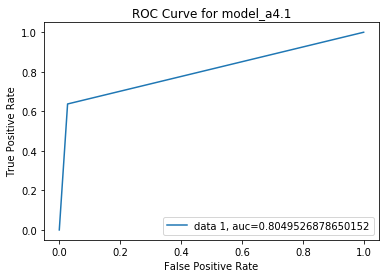

In [49]:
from sklearn import metrics as mt
import matplotlib.pyplot as plt

fpr, tpr, _ = mt.roc_curve(np.array(y_test[:23510]),np.array(pred_out))
auc = mt.roc_auc_score(np.array(y_test[:23510]),np.array(pred_out))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for model_a4.1')
plt.legend(loc=4)
plt.show()

In [44]:
ada_pred_ts

array(['attack', 'normal', 'attack', ..., 'attack', 'normal', 'attack'],
      dtype=object)

In [45]:
y_pred = model.predict(np.array(input_vec))

In [46]:
print(rf_pred_ts[0])
print(ada_pred_ts[0])
#print(svc_pred_ts[0])
print(y_pred[0])

attack
attack
[0.54529    0.9280522  0.63601595]


In [56]:
params = list(perf_measure(np.array(y_test),pred_out))
cal_fpr_acc(params[0],params[1],params[2],params[3])

(0.02724609375, 0.7833262441514249)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
y_pred = model.predict(np.array(input_vec))

In [59]:
y_pred

array([[0.54529   , 0.9280522 , 0.63601595],
       [0.53078127, 0.9319073 , 0.5068124 ],
       [0.55630153, 0.9364217 , 0.61663187],
       ...,
       [0.53658503, 0.94369555, 0.5339846 ],
       [0.5357155 , 0.91088474, 0.514348  ],
       [0.56323403, 0.95364106, 0.44475663]], dtype=float32)

In [63]:
perf_measure(np.array(y_test),y_pred)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [61]:
model.predict(np.array(state_vec_list[30:50]))

array([[0.54481834, 0.91241056, 0.5238888 ],
       [0.5687164 , 0.9408205 , 0.4195541 ],
       [0.5322404 , 0.913938  , 0.50683284],
       [0.5639902 , 0.9564054 , 0.41625684],
       [0.5403747 , 0.9483827 , 0.4877206 ],
       [0.5238851 , 0.9494467 , 0.50607604],
       [0.53918916, 0.95132923, 0.49010623],
       [0.5472345 , 0.9227878 , 0.5186633 ],
       [0.52752846, 0.9401267 , 0.49600342],
       [0.54916203, 0.9290601 , 0.51780945],
       [0.5709472 , 0.9422325 , 0.43179592],
       [0.5513691 , 0.937268  , 0.514813  ],
       [0.5208607 , 0.9496283 , 0.51280123],
       [0.5183734 , 0.94837326, 0.49687892],
       [0.52601093, 0.9443655 , 0.49366578],
       [0.5420322 , 0.94311816, 0.7377108 ],
       [0.54394585, 0.9314756 , 0.5228704 ],
       [0.53415245, 0.9202789 , 0.50705737],
       [0.5392126 , 0.94164133, 0.528171  ],
       [0.55165195, 0.93767035, 0.5157908 ]], dtype=float32)